# Step functions
Construct step functions with activation functions.  By step function we mean a function which transitions from one state to another, typically from the value `0` to the value `1`.

We use the `sigmoid` and `ReLU` activation functions.

Note: we use `PyTorch`'s buil-in functions since we do not invoke functionalities of their `torch.nn.modules` counterparts.

---
tags: pytorch, tutorial, activation function, visualization

# Imports

In [1]:
import torch
import matplotlib.pyplot as plt

%matplotlib inline

# Smooth step functions using sigmoids
The sigmoid function
$$ \sigma(x) = \frac{e^x}{e^x + 1}$$
is itself a (smooth) step function.  The location of the front, and the slope at its center, can be adjusted by composition with an affine (linear) function:
$$y = \sigma(b + mx)\,.$$
Namely the location is at $-\frac bm$ and the slope there is $m\sigma'(0)=m/2$.

*Remark*.  The step function always transitions from `0` to `1` (or from `1` to `0`).

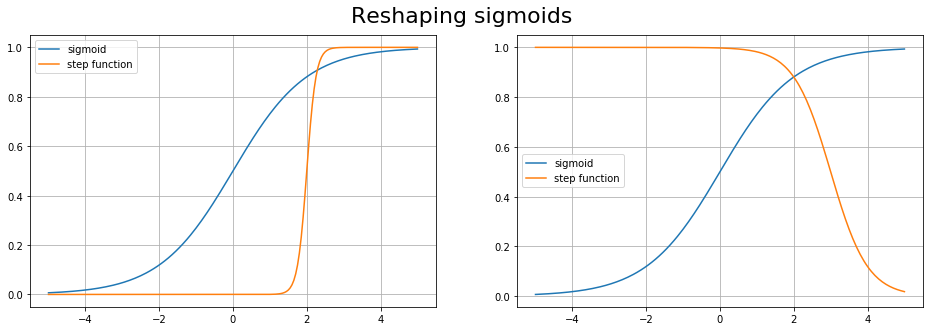

In [2]:
activ = torch.sigmoid

xmin = -5
xmax = 5
k = 20
x = torch.linspace(xmin, xmax, (xmax - xmin)*k + 1).view(-1, 1)


# Upward front
m1 = 8.
s1 = 2.
b1 = -m1*s1
y1 = activ(b1 + m1*x)
y1 = y1

# Downward front
m2 = -2.
s2 = 3.
b2 = -m2*s2
y2 = activ(b2 + m2*x)
y2 = y2

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
ax.plot(x, activ(x), label='sigmoid')
ax.plot(x, y1, label='step function')


ax = axs[1]
ax.plot(x, activ(x), label='sigmoid')
ax.plot(x, y2, label='step function')

for ax in axs:
    ax.legend();
    ax.grid();
    
fig.suptitle("Reshaping sigmoids", fontsize=22, y=.96);

# Piecewise linear step functions using ReLU
A step function is constructed according to
$$y = \text{ReLU}(b_1 + m_1x) - \text{ReLU}(b_2 + m_2x)$$
for suitable choices of the parameteres.  The only requirement is that
$$m_2 = m_1\,.$$
Here, the step function can transition from `0` to any value by adjusting the parameter values.

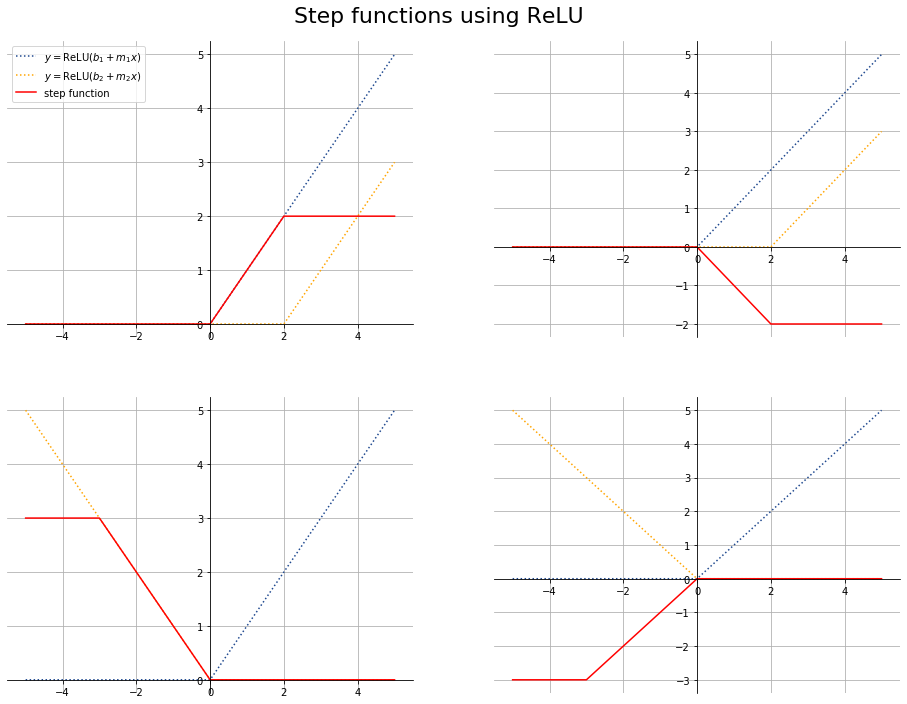

In [3]:
# Mappings

# relu = nn.ReLU()
activ = torch.relu

xmin = -5
xmax = 5
k = 20
x = torch.linspace(xmin, xmax, (xmax - xmin)*k + 1).view(-1, 1)

m1 = 1.
s1 = 0.
b1 = -m1*s1
y1 = activ(b1 + m1*x)

m2 = m1
s2 = s1 + 2.
b2 = -m2*s2
y2 = activ(b2 + m2*x)

m3 = -1.
s3 = 0.
b3 = -m3*s3
y3 = activ(b3 + m3*x)

m4 = m3
s4 = s3 - 3.
b4 = -m4*s4
y4 = activ(b4 + m4*x)

step_ne = y1 - y2
step_se = y2 - y1
step_nw = y3 - y4
step_sw = y4 - y3



# Visualization
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

ax = axs[0,0]
label = '$y=$'+'ReLU'+'$(b_1+m_1x)$'
ax.plot(x, y1, linestyle=':', color='xkcd:cobalt', label=label)
label = '$y=$'+'ReLU'+'$(b_2+m_2x)$'
ax.plot(x, y2, linestyle=':', color='Orange', label=label)
ax.plot(x, step_ne, color='Red', label='step function')
ax.legend();

ax = axs[0,1]
ax.plot(x, y1, linestyle=':', color='xkcd:cobalt')
ax.plot(x, y2, linestyle=':', color='Orange')
ax.plot(x, step_se, color='Red')

ax = axs[1,0]
ax.plot(x, y1, linestyle=':', color='xkcd:cobalt')
ax.plot(x, y3, linestyle=':', color='Orange')
ax.plot(x, step_nw, color='Red')

ax = axs[1,1]
ax.plot(x, y1, linestyle=':', color='xkcd:cobalt')
ax.plot(x, y3, linestyle=':', color='Orange')
ax.plot(x, step_sw, color='Red')


for ax in axs.flatten():
    ax.spines['bottom'].set_position('zero')    
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)   
    ax.grid();
fig.suptitle("Step functions using ReLU", fontsize=22, y=.92);